# Airlines Delay Prediction

In [2]:
#importing dataset
import pandas as pd
import numpy as np
a=pd.read_csv("Airline Delay Predictions.csv")
a

,id,Airline,Flight,DayOfWeek,Time,Length,Delay
0,1,CO,269,3,15,205,1
1,2,US,1558,3,15,222,1
2,3,AA,2400,3,20,165,1
3,4,AA,2466,3,20,195,1
4,5,AS,108,3,30,202,0
...,...,...,...,...,...,...,...
539378,539379,CO,178,5,1439,326,0
539379,539380,FL,398,5,1439,305,0
539380,539381,FL,609,5,1439,255,0
539381,539382,UA,78,5,1439,313,1


In [3]:
a.head()

,id,Airline,Flight,DayOfWeek,Time,Length,Delay
0,1,CO,269,3,15,205,1
1,2,US,1558,3,15,222,1
2,3,AA,2400,3,20,165,1
3,4,AA,2466,3,20,195,1
4,5,AS,108,3,30,202,0


# Task

In [4]:
#Finding longest distance travelled among all flights
print(a[a['Length']==a['Length'].max()])

            id Airline  Flight  DayOfWeek  Time  Length  Delay
7104      7105      CO      15          3   710     655      1
24930    24931      CO      15          4   710     655      1
43007    43008      CO      15          5   710     655      1
60155    60156      CO      15          6   710     655      1
74496    74497      CO      15          7   710     655      1
92565    92566      CO      15          1   710     655      1
110171  110172      CO      15          2   710     655      1
127451  127452      CO      15          3   710     655      0
145250  145251      CO      15          4   710     655      0
163328  163329      CO      15          5   710     655      0
180478  180479      CO      15          6   710     655      1
194836  194837      CO      15          7   710     655      0
212934  212935      CO      15          1   710     655      1
230560  230561      CO      15          2   710     655      1
247873  247874      CO      15          3   710     655

In [35]:
Delay=a[a['Delay']==1]
Delay['DayOfWeek']

0         3
1         3
2         3
3         3
5         3
         ..
539373    5
539376    5
539377    5
539381    5
539382    5
Name: DayOfWeek, Length: 240264, dtype: int64

In [36]:
Delay['DayOfWeek'].value_counts()

3    42254
4    41244
5    35515
1    34030
2    31913
7    31693
6    23615
Name: DayOfWeek, dtype: int64

In [37]:
Delay=a[a['Delay']==1]
Delay['Length']

0         205
1         222
2         165
3         195
5         181
         ... 
539373    320
539376    220
539377    223
539381    313
539382    301
Name: Length, Length: 240264, dtype: int64

In [38]:
print("Airlines keys:\n{}".format(a.keys()))

Airlines keys:
Index(['id', 'Airline', 'Flight', 'DayOfWeek', 'Time', 'Length', 'Delay',
       'New Airline'],
      dtype='object')


In [39]:
Delay['Length'].value_counts()

70     6954
80     6760
85     6229
75     6223
65     6138
       ... 
476       2
386       2
415       2
23        1
0         1
Name: Length, Length: 420, dtype: int64

In [40]:
var=Delay[Delay["DayOfWeek"]==7]
var['Length'].value_counts()

70     899
80     851
65     800
85     799
75     798
      ... 
341      1
404      1
372      1
483      1
0        1
Name: Length, Length: 408, dtype: int64

# ....................

In [6]:
print("Delay:{}".format(a["Delay"]))

Delay:0         1
1         1
2         1
3         1
4         0
         ..
539378    0
539379    0
539380    0
539381    1
539382    1
Name: Delay, Length: 539383, dtype: int64


# Cleaning Data

In [7]:
missing_values_count=a.isnull().sum()
missing_values_count[0:7]

id           0
Airline      0
Flight       0
DayOfWeek    0
Time         0
Length       0
Delay        0
dtype: int64

In [8]:
a.shape

(539383, 7)

In [9]:
a.info

<bound method DataFrame.info of             id Airline  Flight  DayOfWeek  Time  Length  Delay
0            1      CO     269          3    15     205      1
1            2      US    1558          3    15     222      1
2            3      AA    2400          3    20     165      1
3            4      AA    2466          3    20     195      1
4            5      AS     108          3    30     202      0
...        ...     ...     ...        ...   ...     ...    ...
539378  539379      CO     178          5  1439     326      0
539379  539380      FL     398          5  1439     305      0
539380  539381      FL     609          5  1439     255      0
539381  539382      UA      78          5  1439     313      1
539382  539383      US    1442          5  1439     301      1

[539383 rows x 7 columns]>

# Data Visualization

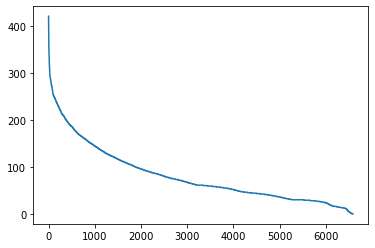

In [10]:
import matplotlib.pyplot as plt
flight = a['Flight'].value_counts()
plt.plot(range(len(flight)), flight)

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

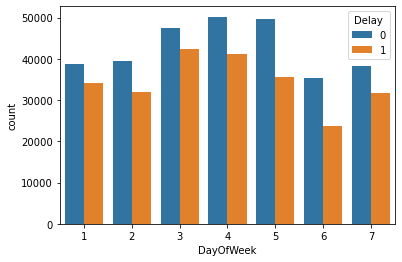

In [9]:
import seaborn as sns
sns.countplot(data=a,x="DayOfWeek",hue='Delay')

# Box Plot

Text(0.5, 1.0, 'Delay with Time')

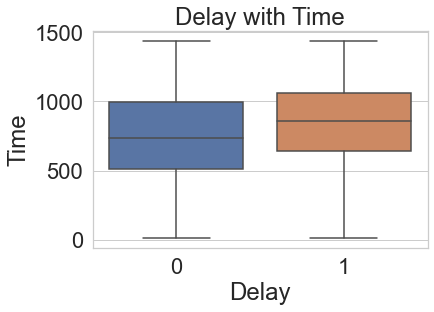

In [11]:
#Box plots for quantitative variables
import seaborn as sns
sns.set(font_scale = 2)
sns.set_style('whitegrid')
sns.boxplot(x='Delay', y = 'Time', data=a).set_title("Delay with Time")

Text(0.5, 1.0, 'Delay with Day of week')

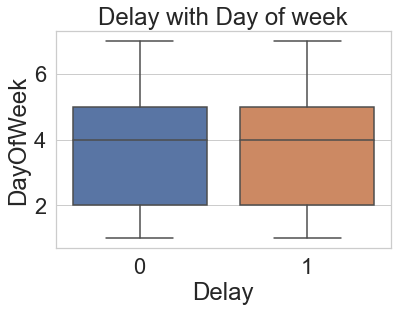

In [12]:
# Delays with day of week
sns.boxplot(x='Delay', y = 'DayOfWeek', data=a).set_title("Delay with Day of week")

# Histogram

<AxesSubplot:xlabel='Flight', ylabel='Count'>

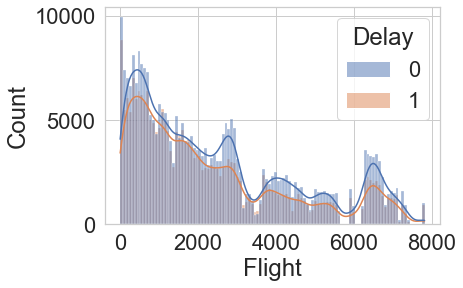

In [13]:
sns.histplot(data=a, x="Flight",kde=True,hue="Delay")

# Data Formatting

In [14]:
#Data Formatting
import pandas as pd
from sklearn.preprocessing import LabelEncoder
Airline=LabelEncoder()
a["New Airline"]=Airline.fit_transform(a["Airline"])

air=a.drop(labels=["Airline"],axis=1)
air.head()


,id,Flight,DayOfWeek,Time,Length,Delay,New Airline
0,1,269,3,15,205,1,4
1,2,1558,3,15,222,1,14
2,3,2400,3,20,165,1,1
3,4,2466,3,20,195,1,1
4,5,108,3,30,202,0,2


In [16]:
air.describe()

,id,Flight,DayOfWeek,Time,Length,Delay,New Airline
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442,9.334527
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015,5.306368
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000,5.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000,10.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000,15.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000,17.000000


In [17]:
airlines_features=['New Airline','Flight','DayOfWeek','Time','Length']
airlines_features

['New Airline', 'Flight', 'DayOfWeek', 'Time', 'Length']

In [18]:
x=air[airlines_features]
x.head()

,New Airline,Flight,DayOfWeek,Time,Length
0,4,269,3,15,205
1,14,1558,3,15,222
2,1,2400,3,20,165
3,1,2466,3,20,195
4,2,108,3,30,202


In [19]:
x.describe()

,New Airline,Flight,DayOfWeek,Time,Length
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,9.334527,2427.928630,3.929668,802.728963,132.202007
std,5.306368,2067.429837,1.914664,278.045911,70.117016
min,0.000000,1.000000,1.000000,10.000000,0.000000
25%,5.000000,712.000000,2.000000,565.000000,81.000000
50%,10.000000,1809.000000,4.000000,795.000000,115.000000
75%,15.000000,3745.000000,5.000000,1035.000000,162.000000
max,17.000000,7814.000000,7.000000,1439.000000,655.000000


# Spliting Data into training and testing set

In [20]:
#spliting 
print("Enter the splitting factor (i.e) ratio between train and test")
splitFactor = float(input())

Enter the splitting factor (i.e) ratio between train and test
0.8


In [21]:
y=air.Delay
y

0         1
1         1
2         1
3         1
4         0
         ..
539378    0
539379    0
539380    0
539381    1
539382    1
Name: Delay, Length: 539383, dtype: int64

In [22]:
import math
n_train = math.floor(splitFactor * x.shape[0])
n_test = math.ceil((1-splitFactor) * x.shape[0])
X_train = x[:n_train]
y_train = y[:n_train]
X_test = x[n_train:]
y_test = y[n_train:]
print("Total Number of rows in train:",X_train.shape[0])
print("Total Number of rows in test:",X_test.shape[0])

Total Number of rows in train: 431506
Total Number of rows in test: 107877


In [22]:
#Before spliting
print("x:")
print(x)
print("y:")
print(y)

x:
        New Airline  Flight  DayOfWeek  Time  Length
0                 4     269          3    15     205
1                14    1558          3    15     222
2                 1    2400          3    20     165
3                 1    2466          3    20     195
4                 2     108          3    30     202
...             ...     ...        ...   ...     ...
539378            4     178          5  1439     326
539379            8     398          5  1439     305
539380            8     609          5  1439     255
539381           13      78          5  1439     313
539382           14    1442          5  1439     301

[539383 rows x 5 columns]
y:
0         1
1         1
2         1
3         1
4         0
         ..
539378    0
539379    0
539380    0
539381    1
539382    1
Name: Delay, Length: 539383, dtype: int64


In [23]:
#After Spliting
print("X_train:")
print(X_train)
print("\ny_train:")
print(y_train)
print("\nX_test")
print(X_test)
print("\ny_test")
print(y_test)

X_train:
        New Airline  Flight  DayOfWeek  Time  Length
0                 4     269          3    15     205
1                14    1558          3    15     222
2                 1    2400          3    20     165
3                 1    2466          3    20     195
4                 2     108          3    30     202
...             ...     ...        ...   ...     ...
431501            5    2527          6  1295     114
431502            5    2981          6  1295      82
431503            6    5154          6  1295      64
431504            8     418          6  1295      83
431505           10    3263          6  1295      50

[431506 rows x 5 columns]

y_train:
0         1
1         1
2         1
3         1
4         0
         ..
431501    0
431502    0
431503    0
431504    0
431505    0
Name: Delay, Length: 431506, dtype: int64

X_test
        New Airline  Flight  DayOfWeek  Time  Length
431506           10    3715          6  1295     110
431507           12    4603   

# Decision Tree

In [24]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model =tree. DecisionTreeClassifier()

In [25]:
tree= model.fit(X_train,y_train)

In [26]:
print("Accuracy on training set:{:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set:{:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set:0.829
Accuracy on test set:0.593


In [27]:
y_pred=tree.predict(X_test)
print("Test set prediction:\n{}".format(y_pred))


Test set prediction:
[1 1 0 ... 0 0 1]


In [28]:
print("Test set score:{:.2f}".format(np.mean(y_pred==y_test)))
print("Test set score:{:.2f}".format(tree.score(X_test,y_test)))


Test set score:0.59
Test set score:0.59


# Prediction

In [29]:
features=np.array([[14,539383,1442,301,1439]]) 
features


array([[    14, 539383,   1442,    301,   1439]])

In [30]:
prediction=tree.predict(features)
y_pred=tree.predict(features)

In [31]:
#Prediction trail-1
print("Test set predictions:\n{}".format(y_pred))


Test set predictions:
[0]


In [32]:
features=np.array([[1,523436,3,1432,5676]]) 
features

array([[     1, 523436,      3,   1432,   5676]])

In [33]:
prediction=tree.predict(features)
y_pred=tree.predict(features)

In [34]:
#Prediction trail-2
print("Test set predictions:\n{}".format(y_pred))


Test set predictions:
[1]
